## Final Project Submission

Please fill out:

- **Student Names:**
  - Boniface Ngechu
  - Abdihakim Isaack
  - Imran Mahfoudh
  - Batuli Abdallah
  - Linet Lydia
  
- **Student Pace:** **Full Time**
- **Instructor Name:** **Maryann Mwikali**


# **Business Understanding**

The movie industry is a rapidly evolving and highly competitive sector, with thousands of films released each year. As major companies are investing heavily in original video content, the need for effective strategic planning has never been more critical. Studios and production companies strive to create films that not only attract large audiences but also maximize profitability. Given the multitude of factors influencing a movie’s success such as genre, budget, and marketing strategic decision making is crucial for any new studio entering this dynamic market.

### **Objective**  
The objective of this project is to equip a newly established film production company with data-driven insights that inform movie production decisions. By analyzing historical box office data and identifying trends in genres, budget ranges, and production strategies associated with high revenue and profitability, the company can guide its investments and improve success rates in an increasingly competitive landscape.

---

# **Business Problem**

### **Problem Statement**  
As the company prepares to launch its new movie studio, the primary goal is to maximize return on investment (ROI) while ensuring high audience satisfaction. However, with the vast array of genres, varying budget sizes, and intense competition among existing studios, predicting what will make a movie successful both financially and in terms of popularity poses a significant challenge.

### **Key Questions to Address**
1. **Which genres have historically generated the highest revenues and profitability?**  
   Understanding which genres perform well can help the company make informed decisions and tailor its offerings to meet audience demand.

2. **What budget range is most likely to yield a positive ROI?**  
   Identifying the optimal budget range for movie production can help mitigate financial risks while maximizing potential revenue.

3. **Which studios have a proven track record of producing high-grossing or popular movies?**  
   Analyzing the performance of established studios could reveal best practices and inform potential collaborations or partnerships.

4. **How do movie ratings and popularity scores correlate with financial success?**  
   Exploring the relationship between critical acclaim and audience reception can assist in prioritizing quality filmmaking alongside financial performance.

5. **What factors influence international versus domestic success?**  
   For the new studio targeting both domestic and global markets, understanding the drivers of success in different regions is essential for strategic planning.

---

# **Analytical Approach**

To address the business problem and key questions, we will conduct exploratory data analysis (EDA) on several datasets, focusing on identifying patterns and trends in:
- **Genre profitability**: Evaluating which genres yield the highest box office returns.
- **Studio performance**: Analyzing how different studios perform in terms of revenue and profitability.
- **Budget impact on ROI**: Understanding how varying budget levels affect return on investment.
- **Audience preferences**: Investigating correlations between movie ratings, popularity scores, and financial success.


**Import necessary libraries** that will be utilized for data manipulation, analysis, and visualization:
These libraries provide essential tools for data analysis and visualization tasks.


In [19]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Use **Pandas** to read a CSV file named `bom.movie_gross.csv` into a DataFrame called `bom_df`. This DataFrame will contain the data from the CSV file for further analysis and manipulation.


In [4]:
bom_df = pd.read_csv("bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We are connecting to the **SQLite database** `im.db`, creating a cursor, and retrieving the names of all tables in the database.


In [5]:
#Connect to the SQlite database for im.db
conn = sqlite3.connect("im.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We are loading and displaying sample data from the **movies** and **ratings** tables in the SQLite database.


In [6]:
import pandas as pd

# Example of loading a few rows from the movies table
movies_sample = pd.read_sql_query("SELECT * FROM movie_basics LIMIT 5;", conn)
print("Movies Table Sample:\n", movies_sample)

# Similarly, you can check other tables
ratings_sample = pd.read_sql_query("SELECT * FROM movie_ratings LIMIT 5;", conn)
print("Ratings Table Sample:\n", ratings_sample)


Movies Table Sample:
     movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
Ratings Table Sample:
      movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt

Execute a SQL query to retrieve all records from the **movie_basics** table and storing the result in the variable `query`.


In [7]:
query = pd.read_sql("SELECT * FROM movie_basics", conn)
query

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
query = pd.read_sql("SELECT * FROM movie_ratings", conn)
query

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Retrieve data by joining the `movie_basics` and `movie_ratings` tables, creating a comprehensive dataset containing
key movie details such as `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`,
`averagerating`, and `numvotes`. The joined data is then loaded into a pandas DataFrame (`imdb_data`) for further analysis.


In [9]:
#Joining movie_basics table and movie_ratings table
imdb_data = pd.read_sql_query("""
     SELECT movie_basics.movie_id,
            movie_basics.primary_title,
            movie_basics.original_title,
            movie_basics.start_year,
            movie_basics.runtime_minutes, 
            movie_basics.genres,
            movie_ratings.averagerating,
            movie_ratings.numvotes 
     FROM movie_basics
     JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
""", conn)

imdb_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [10]:
#loading movie_budget data set.
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Movie Budgets Dataset**  
   The `movie_budgets` DataFrame is loaded from the `tn.movie_budgets.csv` file. This dataset contains financial information on various movies, including production budgets and revenue details.



In [11]:
movies = pd.read_csv("tmdb.movies.csv")
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## Data Cleaning

In this section, we prepare the dataset for analysis by ensuring data quality and consistency. Key steps include:


#### 1. Handling Missing Values
Identifying and addressing any missing data, either by filling values or removing incomplete rows, to prevent analysis inaccuracies.


In [12]:
#Check data types of domestic_gross and foreign_gross columns
print(bom_df[['domestic_gross', 'foreign_gross']].dtypes)

#Convert domestic_gross and foreign_gross to numeric after removing commas, handling errors with coerce
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'].astype(str).str.replace(',', '', regex=False), errors ='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].astype(str).str.replace(',', '', regex=False), errors ='coerce')

#Check data types after conversion
print("\nData types after conversion:")
print(bom_df[['domestic_gross', 'foreign_gross']].dtypes)

#Fill missing values in domestic_gross and foreign_gross with the median in bom_df
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median(), inplace=True)
bom_df['foreign_gross'].fillna(bom_df['foreign_gross'].median(), inplace=True)
    
#Handle missing values in studio column and fill with Unknown
if 'studio' in bom_df.columns:
    bom_df['studio'].fillna('Unknown', inplace=True)

#Handle missing values in imdb_data dataframe, checking if the columns exist
if 'original_title' in imdb_data.columns:
    imdb_data['original_title'].fillna('Unknown', inplace=True)

if 'runtime_minutes' in imdb_data.columns:
    imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median(), inplace=True)
    
if 'genres' in imdb_data.columns:
    imdb_data['genres'].fillna('Unknown', inplace=True)

#Fill missing values with zero
movie_budgets['production_budget'].fillna(0, inplace=True)
movie_budgets['domestic_gross'].fillna(0, inplace=True)
movie_budgets['worldwide_gross'].fillna(0, inplace=True)

#Drop 'Unnamed: 0' column in movies if it exists
movies.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

#Final check for missing values in each dataset
print("\nCheck for missing values:")
print("\nbom_df:", bom_df.isnull().sum())
print("\nimdb_data:", imdb_data.isnull().sum())
print("\nmovies:", movies.isnull().sum())
print("\nmovie_budgets:", movie_budgets.isnull().sum())

domestic_gross    float64
foreign_gross      object
dtype: object

Data types after conversion:
domestic_gross    float64
foreign_gross     float64
dtype: object

Check for missing values:

bom_df: title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

imdb_data: movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

movies: genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

movie_budgets: id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


#### 2. Removing Duplicates
Checking for and eliminating duplicate entries to ensure each record is unique and avoid data redundancy.


In [13]:
#Remove duplicates from imdb_data
print("Duplicates in imdb_data before removal:", imdb_data.duplicated().sum())
imdb_data.drop_duplicates(inplace=True)
print("Duplicates in imdb_data after removal:", imdb_data.duplicated().sum())

#Remove duplicates from bom_df
print("Duplicates in bom_df before removal:", bom_df.duplicated().sum())
bom_df.drop_duplicates(inplace=True)
print("Duplicates in bom_df after removal:", bom_df.duplicated().sum())

#Remove duplicates from movies
print("Duplicates in movies before removal:", movies.duplicated().sum())
movies.drop_duplicates(inplace=True)
print("Duplicates in movies after removal:", movies.duplicated().sum())

#Remove duplicates from movie_budgets
print("Duplicates in movie_budgets before removal:", movie_budgets.duplicated().sum())
movie_budgets.drop_duplicates(inplace=True)
print("Duplicates in movie_budgets after removal:", movie_budgets.duplicated().sum())


Duplicates in imdb_data before removal: 0
Duplicates in imdb_data after removal: 0
Duplicates in bom_df before removal: 0
Duplicates in bom_df after removal: 0
Duplicates in movies before removal: 1020
Duplicates in movies after removal: 0
Duplicates in movie_budgets before removal: 0
Duplicates in movie_budgets after removal: 0


#### 3. Creation of a new column
Adding new columns as needed, either by combining existing data or calculating new metrics to enhance analysis.


In [14]:
#Check if the required columns exist
if 'domestic_gross' in bom_df.columns and 'foreign_gross' in bom_df.columns:
    #Convert to numeric, handling errors by coercing invalid parsing to NaN
    bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'].fillna(0), errors='coerce')
    bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].fillna(0), errors='coerce')  
    
    #Calculate total gross revenue
    bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
    
    #Set pandas display options to show numbers in standard format
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    #Display the first few rows to verify the new column
    print(bom_df[['domestic_gross', 'foreign_gross', 'total_gross']].head())
else:
    print("Required columns 'domestic_gross' or 'foreign_gross' are missing from the DataFrame.")

   domestic_gross  foreign_gross   total_gross
0    415000000.00   652000000.00 1067000000.00
1    334200000.00   691300000.00 1025500000.00
2    296000000.00   664300000.00  960300000.00
3    292600000.00   535700000.00  828300000.00
4    238700000.00   513900000.00  752600000.00


#### 4. Checking for outliers
Identifying potential outliers in the dataset to assess whether they should be addressed or excluded based on their impact on the analysis.


In [15]:
#Function to calculate summary statistics for a given column
def summarize_column(df, column):
    if column in df.columns:
        return df[column].describe()
    else:
        raise ValueError(f"Column '{column}' does not exist in the dataframe.")

#Function to count outliers using IQR method
def count_outliers(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    else:
        raise ValueError(f"Column '{column}' does not exist in the dataframe.")                         

#Function to count outliers using IQR method
def remove_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        raise ValueError(f"Column '{column}' does not exist in the dataframe.")
                         
#Check if imdb_data is a dataframe
if isinstance(imdb_data, pd.DataFrame):
    #Check summary statistics before removing outliers
    print("Summary statistics before removing outliers:")
    print(summarize_column(imdb_data, 'averagerating'))
    print(summarize_column(imdb_data, 'numvotes'))
                         
    #Count the number of outliers before removal
    outliers_before_avg_rating = count_outliers(imdb_data, 'averagerating')
    outliers_before_num_votes = count_outliers(imdb_data, 'numvotes')
                         
    #Remove outliers for avg_rating in imdb_data
    imdb_data = remove_outliers_iqr(imdb_data, 'averagerating')
                         
    #Remove outliers for num_votes in imdb_data
    imdb_data = remove_outliers_iqr(imdb_data, 'numvotes')
                         
    #Check summary statistics after removing outliers
    print("\nSummary statistics after removing outliers:")
    print(summarize_column(imdb_data, 'averagerating'))
    print(summarize_column(imdb_data, 'numvotes'))
                         
    #Count the number of outliers after removal
    outliers_after_avg_rating = count_outliers(imdb_data, 'averagerating')
    outliers_after_num_votes = count_outliers(imdb_data, 'numvotes')
                         
    #Print the number of outliers before and after removal
    print(f"\nNumber of outliers in 'averagerating' before: {outliers_before_avg_rating}, after: {outliers_after_avg_rating}")
    print(f"Number of outliers in 'numvotes' before: {outliers_before_num_votes}, after: {outliers_after_num_votes}")
else:
    print("The query did not return a DataFrame.")
                        

Summary statistics before removing outliers:
count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64
count     73856.00
mean       3523.66
std       30294.02
min           5.00
25%          14.00
50%          49.00
75%         282.00
max     1841066.00
Name: numvotes, dtype: float64

Summary statistics after removing outliers:
count   61037.00
mean        6.44
std         1.42
min         2.70
25%         5.50
50%         6.60
75%         7.50
max        10.00
Name: averagerating, dtype: float64
count   61037.00
mean       95.33
std       139.44
min         5.00
25%        12.00
50%        31.00
75%       112.00
max       684.00
Name: numvotes, dtype: float64

Number of outliers in 'averagerating' before: 1172, after: 0
Number of outliers in 'numvotes' before: 11758, after: 7153


#### 5. Standardizing genres and normalizing year formats in movie_basics
This step involves ensuring consistency in genre naming conventions and converting all year formats to a standard format for easier analysis. This may include correcting typos, unifying genre categories, and standardizing the year representation (e.g., ensuring all years are in a four-digit format).


In [16]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

#Consistent formats for genres
def standardize_genres(genres):
    if isinstance(genres, str):
        return [genre.strip() for genre in genres.split(',')]
    return genres

movie_basics['genres'] = movie_basics['genres'].apply(standardize_genres)

#Normalize year formats in start_year to a standard year format
#Ensure all values in start_year are integers and replace invalid years with NaN
movie_basics['start_year'] = pd.to_numeric(movie_basics['start_year'], errors='coerce')

#Checking results
print("\nUpdated movie_basics:")
print(movie_basics[['genres', 'start_year']].head())


Updated movie_basics:
                     genres  start_year
0    [Action, Crime, Drama]        2013
1        [Biography, Drama]        2019
2                   [Drama]        2018
3           [Comedy, Drama]        2018
4  [Comedy, Drama, Fantasy]        2017


#### 6. Removing commas from numerical columns in csv files
In this step, commas are removed from numerical columns within CSV files to facilitate accurate data processing and analysis. This is crucial as numerical values with commas may be interpreted as strings, leading to errors in calculations and aggregations.


In [17]:
#Function to clean numerical columns by removing commas and converting to numeric
def clean_numerical_column(df, column):
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', '', regex=False), errors='coerce')

#Remove commas and convert columns to numeric in bom_df
clean_numerical_column(bom_df, 'domestic_gross')
clean_numerical_column(bom_df, 'foreign_gross')

#Remove commas and convert columns to numeric in movies
clean_numerical_column(movies, 'popularity')

#Check results
print("\nUpdated bom_df:")
print(bom_df[['domestic_gross', 'foreign_gross']].head())

print("\nUpdated movies:")
print(movies[['popularity']].head())


Updated bom_df:
   domestic_gross  foreign_gross
0    415000000.00   652000000.00
1    334200000.00   691300000.00
2    296000000.00   664300000.00
3    292600000.00   535700000.00
4    238700000.00   513900000.00

Updated movies:
   popularity
0       33.53
1       28.73
2       28.52
3       28.00
4       27.92


### DATA VISUALIZATION

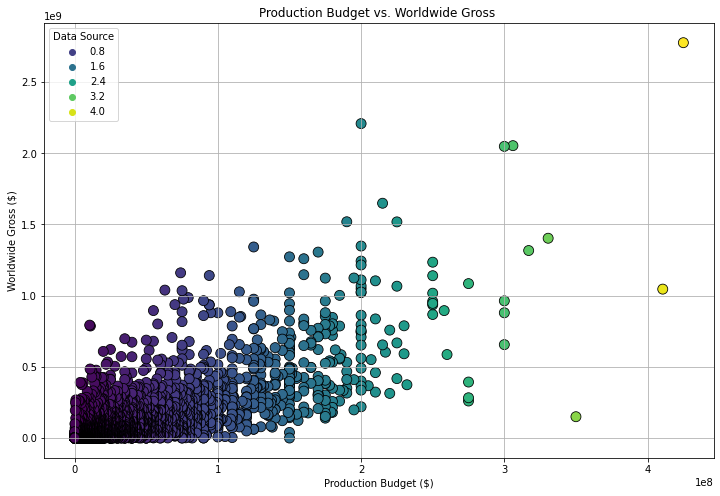

In [20]:
#movie_budgets(tn.movie_budgets)

# Load the data
df = pd.read_csv('tn.movie_budgets.csv')


# Convert 'production_budget' and 'worldwide_gross' to numeric
df['production_budget'] = df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)



# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,  # Pass the DataFrame here, not the file path
    x='production_budget',
    y='worldwide_gross',
    hue='production_budget',  # Replace this with the actual column name for categories or sources
    palette='viridis',  # Color palette (can change to your preference)
    s=100,  # Marker size
    edgecolor='black'
)

# Adding labels and title
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Production Budget vs. Worldwide Gross ')
plt.legend(title='Data Source')  # Adjust if you have a different column
plt.grid(True)

# Show plot
plt.show()

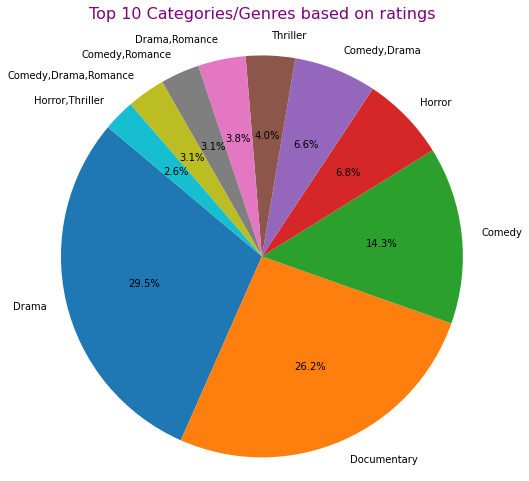

In [21]:
#sql
# Step 1: Connect to the database
conn = sqlite3.connect('im.db')

# Step 2: Query the data
query1 = "SELECT * FROM movie_basics;"
query2 = "SELECT * FROM movie_ratings;"
data1 = pd.read_sql_query(query1, conn)
data2 = pd.read_sql_query(query2, conn)
# Step 3: Close the connection
conn.close()

# Step 4: Merge the DataFrames on a common column 
merged_data = pd.merge(data1, data2, on='movie_id')

category_counts = merged_data['genres'].value_counts()

top_10_categories = category_counts.nlargest(10)
# Step 6: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categories/Genres based on ratings', fontsize=16, color='purple', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


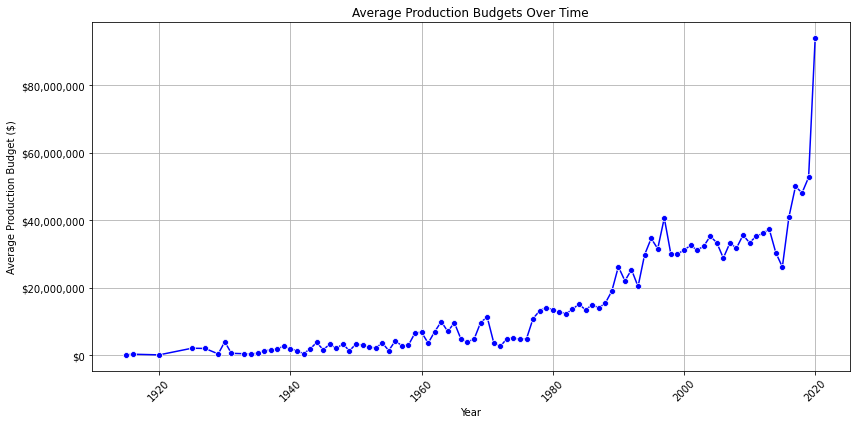

In [22]:
import matplotlib.ticker as ticker

# Load your actual dataset
df = pd.read_csv('tn.movie_budgets.csv')

# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the year from 'release_date'
df['year'] = df['release_date'].dt.year

# Convert 'production_budget' to numeric after removing the dollar sign and commas
df['production_budget'] = df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Group by year and calculate the average production budget
average_budget_per_year = df.groupby('year')['production_budget'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=average_budget_per_year,
    x='year',
    y='production_budget',
    marker='o',  
    color='blue'
)

# Formatting the y-axis to show currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))


# Adding labels and title
plt.title('Average Production Budgets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Production Budget ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### we merge our two csv files for the below visualizations

In [42]:
# Merge the dataframes (adjust the `on` parameter as needed)
merged_df = pd.merge(movies, bom_df, on='title')  # Use 'outer' or 'inner' for different merge types

# Save to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)
merged_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,total_gross
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,P/DW,217600000.00,277300000.00,2010,494900000.00
1,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,Par.,312400000.00,311500000.00,2010,623900000.00
2,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186,WB,292600000.00,535700000.00,2010,828300000.00
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,Toy Story 3,7.70,8340,BV,415000000.00,652000000.00,2010,1067000000.00
4,"[16, 10751, 35]",20352,en,Despicable Me,23.67,2010-07-09,Despicable Me,7.20,10057,Uni.,251500000.00,291600000.00,2010,543100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.90,2018-11-30,Elliot: The Littlest Reindeer,3.40,7,Scre.,24300.00,18700000.00,2018,18724300.00
2452,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.71,2018-02-02,Bilal: A New Breed of Hero,6.80,54,VE,491000.00,1700000.00,2018,2191000.00
2453,[35],498919,es,La Boda de Valentina,2.55,2018-02-09,La Boda de Valentina,6.30,7,PNT,2800000.00,18700000.00,2018,21500000.00
2454,[18],470641,hi,मुक्काबाज़,2.28,2018-01-12,Mukkabaaz,7.50,18,Eros,75900.00,18700000.00,2018,18775900.00


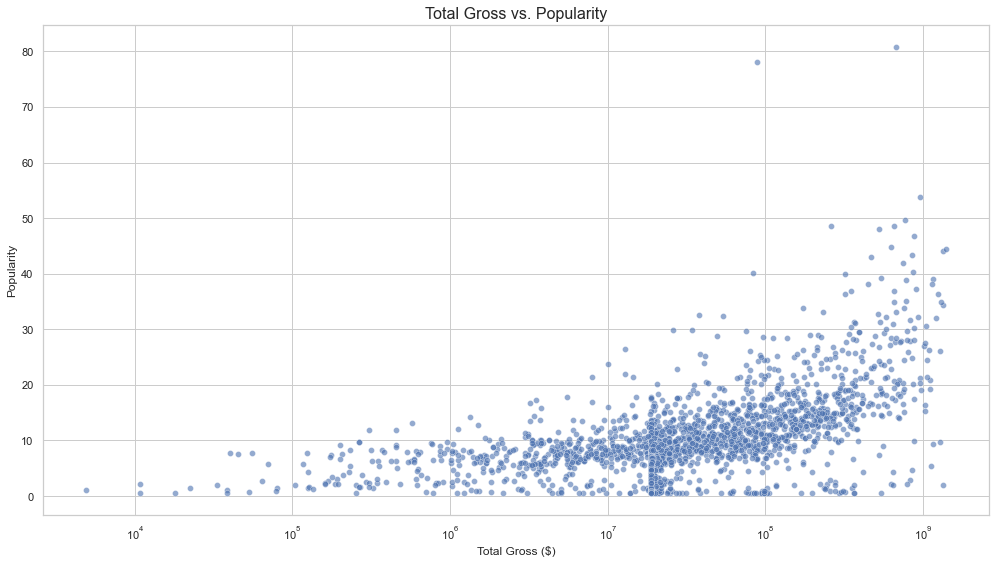

In [25]:
# 1. Total Gross vs. Popularity
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')
sns.scatterplot(
    data=merged_df,
    x='total_gross',
    y='popularity',
    alpha=0.6,
    palette='deep'
)
plt.title('Total Gross vs. Popularity', fontsize=16)
plt.xlabel('Total Gross ($)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xscale('log')  # Optional: log scale for better visibility
plt.tight_layout()
plt.show()


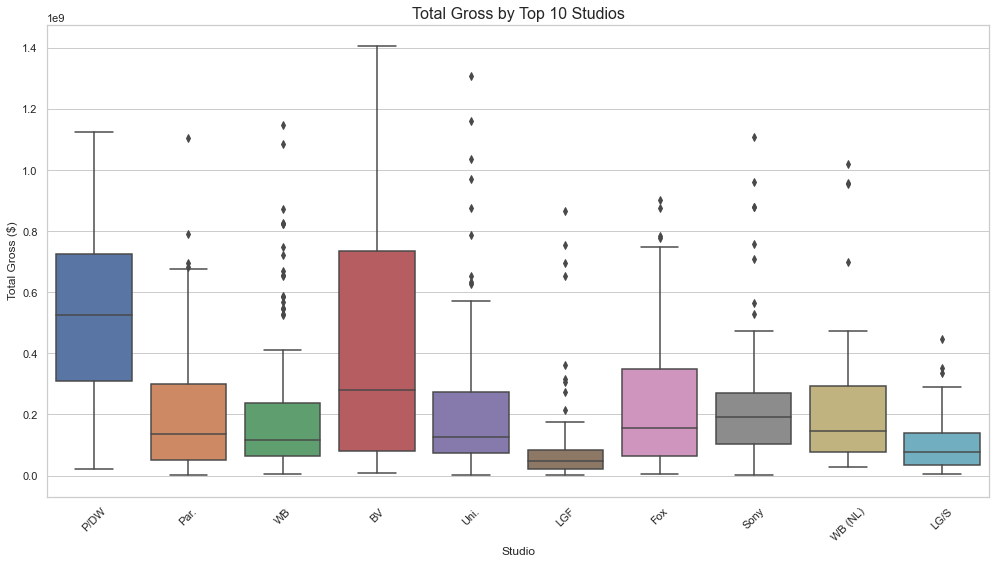

In [26]:
# Calculate total gross
merged_df['total_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

# Drop rows with NaN in total_gross or studio
merged_df = merged_df.dropna(subset=['total_gross', 'studio'])

# Group by studio and sum total gross
top_studios = merged_df.groupby('studio')['total_gross'].sum().reset_index()

# Sort by total gross in descending order and get the top 10 studios
top_10_studios = top_studios.sort_values(by='total_gross', ascending=False).head(10)

# Filter the merged_df to include only the top 10 studios
top_10_studios_names = top_10_studios['studio'].tolist()
filtered_df = merged_df[merged_df['studio'].isin(top_10_studios_names)]

# Create the box plot for top 10 studios
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_df,
    x='studio',
    y='total_gross',
    palette='deep'
)
plt.title('Total Gross by Top 10 Studios', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Total Gross ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


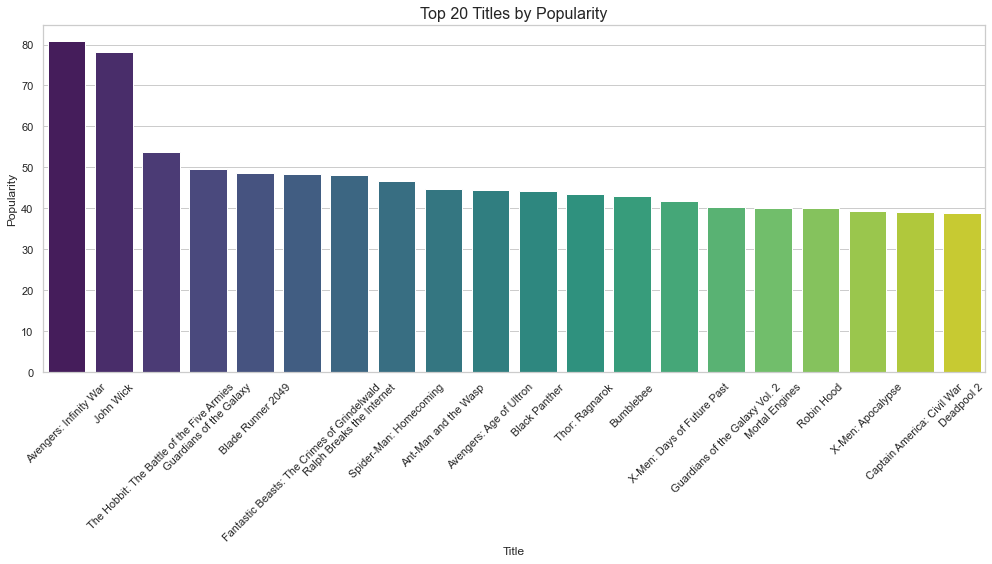

<Figure size 1008x576 with 0 Axes>

In [29]:
#  3. Title vs. Popularity
plt.figure(figsize=(14, 8))
sns.barplot(
    data=merged_df.sort_values(by='popularity', ascending=False).head(20),  # Show top 20 titles by popularity
    x='title',
    y='popularity',
    palette='viridis'
)
plt.title('Top 20 Titles by Popularity', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()# 2. Total Gross vs. Studio
plt.figure(figsize=(14, 8))

plt.show()




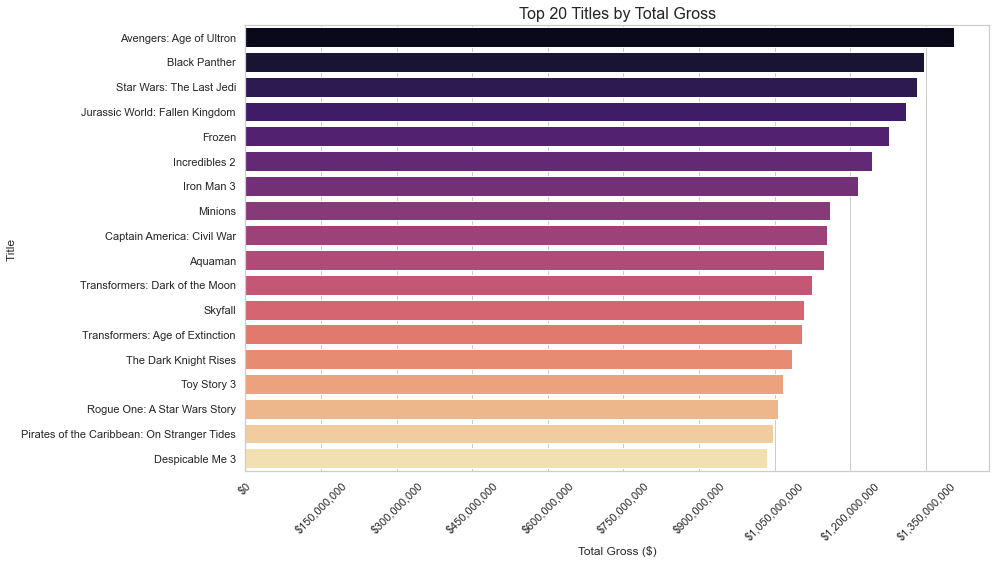

In [33]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=merged_df.sort_values(by='total_gross', ascending=False).head(20),  # Show top 20 titles by total gross
    x='total_gross',
    y='title',
    palette='magma'
)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Top 20 Titles by Total Gross', fontsize=16)
plt.xlabel('Total Gross ($)', fontsize=12)
plt.ylabel('Title ', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


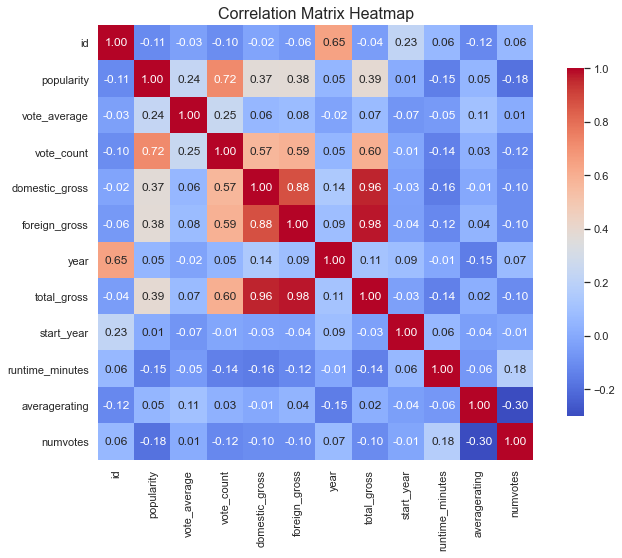

In [45]:


# Step 3: Merge the DataFrames
# Adjust the 'on' parameter to the appropriate common columns
merged_df = pd.merge(movies, bom_df, on='title' ,how='inner')
merged_df = pd.merge(merged_df, imdb_data, on='original_title', how='inner')  # Merge with SQL data

# Step 4: Calculate the correlation matrix
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 8))

# Step 6: Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Step 7: Titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()



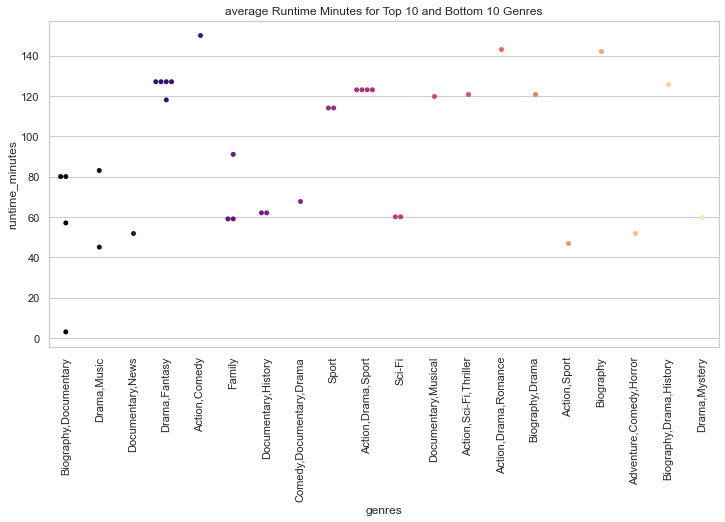

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
# Step 1: Calculate the average runtime for each genre
average_runtime = merged_df.groupby('genres')['runtime_minutes'].mean().reset_index()

# Step 2: Identify the top 10 and bottom 10 genres
top_10_genres = average_runtime.nlargest(10, 'runtime_minutes')
bottom_10_genres = average_runtime.nsmallest(10, 'runtime_minutes')

# Combine top and bottom genres
selected_genres = pd.concat([top_10_genres, bottom_10_genres])

# Step 3: Filter the original DataFrame to include only these genres
filtered_df = merged_df[merged_df['genres'].isin(selected_genres['genres'])]

# Step 4: Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_df, x='genres', y='runtime_minutes', palette='magma')
plt.title('average Runtime Minutes for Top 10 and Bottom 10 Genres')
plt.xticks(rotation=90)
plt.show()
